## <center style="color:#00008B">TP3 Analyse Numérique  </center > 

## <center style="color:#00008B" >Khelifi Ramla  </center>

In [2]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Méthodes du rectangle gauche

<p> Dans cette méthode, on calcule l’intégrale numérique en réalisant une somme de surfaces de rectangles. Le domaine d’intégration est découpé en intervalles et on fait comme si la fonction restait constante sur chaque intervalle.

Sur chaque intervalle, on réalise ainsi l’approximation suivante :</p>

$$\int_a^b f(t) \,dt ≈ (b-a)f(t)$$

comme montre la figure suivante:
<img src="rec.PNG" alt="rectangles" width="400"/>

In [3]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches, N={}'.format(self.n) )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

    

## Méthodes du trapéze 

<p>Comme son nom l’indique, cette méthode d’intégration utilise une somme de surfaces de trapèzes.

Sur chaque intervalle, on réalise alors l’approximation suivante :
$$\int_a^b f(t) \,dt ≈ b−a2[f(a)+f(b)$$
 </p>

comme montre la figure suivante:
<img src="trapeze.PNG" alt="rectangles" width="400"/>

In [4]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] 
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] 
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)
        plt.plot(xl, yl,"cs")
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes , N ={}'.format(self.n) )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

## Méthodes de Simpson

<p>La méthode de Simpson consiste à remplacer la courbe $y = f(x)$ par un arc de parabole sur l’intervalle$ [x_i-_1,x_i+_1]$ , puis à intégrer la fonction ainsi obtenue sur l’intégrale .
    <br>l'aire obtenue : 
$$V.A = \frac {b-a}{6}  \left(f(a)+\frac {f(a)+f(b)}2 +f(b) \right) $$</p>

comme montre la figure suivante:
<img src="sim.png"  width="400"/>


In [5]:
class Simpson(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n 

    def integrate(self,f):
        x=self.x 
        y=f(x) 
        h = float(x[1] - x[0])
        n = len(x) - 1
        if n % 2 == 1:
            n -= 1
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def Graph(self,f,resolution=1001):#1000 points 1001 résolution juste pour dessiner f
        xl = self.x #pt support
        yl = f(xl) #yi
        xlist_fine=np.linspace(self.a, self.b, resolution)
        # pour le graph de la fonction f #intervalle ab subdiviser en 1000 poitns
        for i in range(self.n):#range intervalle 0 à n
            xx=np.linspace(xl[i], xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2#pt milieu
            aa=xl[i]#borne gauche
            bb=xl[i+1]#borne droite
            l0 = (xx-m)/(aa-m)*(xx-bb)/(aa-bb)
            l1 = (xx-aa)/(m-aa)*(xx-bb)/(m-bb)
            l2 = (xx-aa)/(bb-aa)*(xx-m)/(bb-m)
            P = f(aa)*l0 + f(m)*l1 + f(bb)*l2#fonction dde polynome
            plt.plot(xx,P,'b')
            plt.plot(m,f(m),"r*")
        yflist_fine = f(xlist_fine)#fontion f
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.plot(xl, yl,'bo')
        
        plt.ylabel('f(x)')
        plt.title('Methode de Simpson, N = {}'.format(self.n))
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
        

## Méthodes du point Milieu 

On approche l’aire : 
$$\int_a^b f(t) \,dt$$ 

comme montre la figure suivante:
    <img src="milieu.png" alt="rectangles" width="400"/>

In [6]:
class Milieu(object): 
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl=f(xl);
        xlist_fine=np.linspace(self.a, self.b, resolution)        
        for i in range(self.n):            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] 
            y_rect = [0  , f(m), f(m)  , 0 , 0 ] 
            plt.plot(x_rect, y_rect,"r")
            plt.plot(m,f(m),"b*")
            
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Methode de Point Milieu, N = {}'.format(self.n))
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
        


In [7]:
output = widgets.Output()
with output:
    fig= plt.figure(figsize=(10,7))
fig.canvas.toolbar_position = 'bottom'

<Figure size 720x504 with 0 Axes>

In [8]:
Sel=widgets.Dropdown(
    options=[('Méthode des réctangles gauches', 1), ('Méthode des Trapèzes', 2),('Méthodes des Points Milieux', 3) ,('Méthodes de Simpson', 4)],
    value=1,
    description='Méthode:',
)
text_func = widgets.Text(value='', description='Fonction', continuous_update=False)
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
text_a = widgets.Text(value='1', description='a', continuous_update=False)
text_b = widgets.Text(value='2', description='b', continuous_update=False)
text_n = widgets.Text(value='4', description='n', continuous_update=False)
text_int = widgets.Text(value='', description='I_n', continuous_update=True)
button = widgets.Button(description="Calculer")

def sim(b):
    dic={1:RectangleG,2:Trapezoidal,3:Milieu,4:Simpson}
    s=Sel.value
    plt.cla()
    func=lambda x:eval(text_func.value)
    R=dic[s](float(text_a.value), float(text_b.value),int(text_n.value),func)
    R.Graph(func)
    text_int.value=str(R.integrate(func))
    text_int.description='I_'+text_n.value



def update_a(change):
    change.new    
def update_b(change):
    change.new
def update_n(change):
    change.new
def update_f(change):
    change.new


text_func.observe(update_f, 'value')
text_a.observe(update_a, 'value')
text_b.observe(update_b, 'value')

In [9]:

def boutton(b):
    with output:
        fig.clear()
        sim(text_b.value)
        

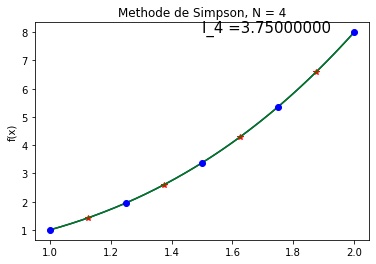

In [13]:
vbox1 = widgets.VBox([Sel, text_func,text_a,text_b,text_n,button,text_int])
vbox2 = widgets.VBox([ output])

box_layout = widgets.Layout(
        border='solid 2px gray',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')

vbox1.layout = box_layout
vbox2.layout = box_layout
button.on_click(boutton)
widgets.HBox([vbox1, vbox2])